In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

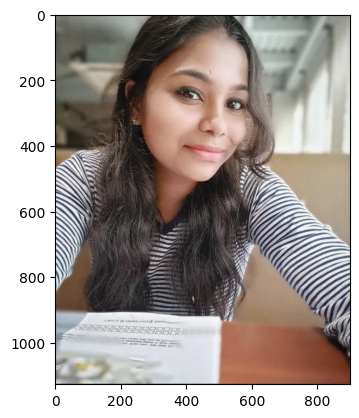

In [ ]:
filename ="/content/cartoonify.jpeg"
img = read_file(filename)

**CREATE EDGE MASK**

In [ ]:
def edge_mask(img , line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

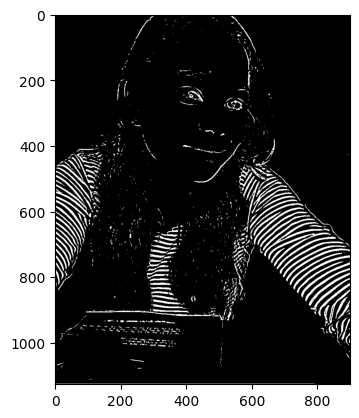

In [ ]:
line_size, blur_value = 7,7
edges = edge_mask(img , line_size, blur_value)

plt.imshow(edges , cmap ='binary')
plt.show()


**REDUCE THE COLOR PALETTE**

In [ ]:
def color_quantization(img, k):

  #transform the image
  data = np.float32(img).reshape((-1,3))

  #determine criteria
  criteria = (cv2.TERM_CRITERIA_EPA+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implementing K-MEANS
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [ ]:
img = color_quantization(img, k=6)

plt.imshow(img)
plt.show()


AttributeError: ignored

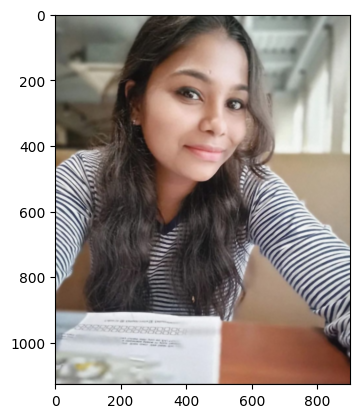

In [ ]:
#Reduce the noise

blurred = cv2.bilateralFilter(img, d=7,sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

**COMBINE EDGE MASK WITH THE QUANTIZE IMG**

In [ ]:
def cartoon(blurred):
  c = cv2.bitwise_and(blurred , blurred , mask= edges)
  plt.imshow(org_img)
  plt.title("org_img")
  plt.show()

  plt.imshow(c)
  plt.title("cartoonified image")
  plt.show()

  cartoon()